In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [17]:
hp_space = pd.read_csv('/data/HP_space.csv')
train_loss = pd.read_csv('/data/train_loss.csv')
eval_loss = pd.read_csv('/data/eval_loss.csv')
eval_acc = pd.read_csv('/data/eval_acc.csv')

<ipython-input-17-984f45a1f98d>:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,

In [3]:
hp_space.head()

,L1,H1,L2,H2
0,3,4,0,0
1,3,5,0,0
2,3,6,0,0
3,3,7,0,0
4,3,8,0,0


In [4]:
train_loss.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,epoch_1,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 7494,Unnamed: 7495,Unnamed: 7496,Unnamed: 7497,Unnamed: 7498,Unnamed: 7499,Unnamed: 7500,Unnamed: 7501,Unnamed: 7502,Unnamed: 7503
0,L1,H1,L2,H2,batch_1,batch_2,batch_3,batch_4,batch_5,batch_6,...,batch_41,batch_42,batch_43,batch_44,batch_45,batch_46,batch_47,batch_48,batch_49,batch_50
1,3,4,0,0,2.285,2.254,2.168,2.103,2.075,1.998,...,0.598,0.601,0.619,0.577,0.592,0.59,0.614,0.638,0.634,0.644
2,3,5,0,0,2.283,2.187,2.093,2.061,2.015,1.988,...,0.505,0.448,0.469,0.541,0.48,0.523,0.49,0.514,0.462,0.485
3,3,6,0,0,2.285,2.231,2.13,2.086,2.082,2.011,...,0.549,0.533,0.539,0.572,0.577,0.568,0.565,0.565,0.552,0.579
4,3,7,0,0,2.297,2.209,2.147,2.095,1.992,2.026,...,0.559,0.547,0.534,0.557,0.536,0.532,0.547,0.533,0.569,0.518


In [5]:
eval_loss.head()

,L1,H1,L2,H2,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,...,epoch_141,epoch_142,epoch_143,epoch_144,epoch_145,epoch_146,epoch_147,epoch_148,epoch_149,epoch_150
0,3,4,0,0,1.52332,1.33248,1.27089,1.21834,1.20135,1.14159,...,1.02031,1.02160,1.02284,1.02495,1.04469,1.03849,1.02693,1.02176,1.02810,1.00954
1,3,5,0,0,1.42391,1.31039,1.14298,1.15141,1.05960,1.10058,...,0.90324,0.89469,0.90203,0.90636,0.89365,0.89999,0.91248,0.89115,0.89431,0.91435
2,3,6,0,0,1.51030,1.35697,1.24436,1.19246,1.16901,1.09636,...,0.98321,0.98734,0.99506,0.99040,0.98634,0.98861,0.98281,0.96875,0.98039,0.97649
3,3,7,0,0,1.49031,1.28391,1.21113,1.19441,1.09927,1.07175,...,0.92473,0.91630,0.90956,0.90825,0.92119,0.91781,0.91272,0.91210,0.91290,0.91833
4,3,8,0,0,1.42823,1.25468,1.18538,1.09234,1.04129,1.00743,...,0.88154,0.87421,0.87666,0.86612,0.86576,0.86915,0.87428,0.87241,0.88057,0.87955


In [6]:
eval_acc.head()

,L1,H1,L2,H2,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,...,epoch_141,epoch_142,epoch_143,epoch_144,epoch_145,epoch_146,epoch_147,epoch_148,epoch_149,epoch_150
0,3,4,0,0,0.4406,0.5187,0.5408,0.5667,0.5715,0.5954,...,0.6747,0.6711,0.6728,0.6693,0.6741,0.6778,0.6755,0.6765,0.6723,0.6712
1,3,5,0,0,0.4840,0.5188,0.5925,0.5950,0.6226,0.6209,...,0.7244,0.7220,0.7242,0.7213,0.7223,0.7243,0.7227,0.7230,0.7225,0.7228
2,3,6,0,0,0.4502,0.5097,0.5534,0.5717,0.5885,0.6129,...,0.6907,0.6872,0.6890,0.6874,0.6894,0.6884,0.6908,0.6875,0.6884,0.6903
3,3,7,0,0,0.4642,0.5356,0.5693,0.5785,0.6153,0.6260,...,0.7106,0.7103,0.7139,0.7145,0.7118,0.7117,0.7124,0.7111,0.7121,0.7133
4,3,8,0,0,0.4891,0.5453,0.5748,0.6139,0.6328,0.6514,...,0.7258,0.7287,0.7271,0.7307,0.7285,0.7293,0.7269,0.7275,0.7269,0.7289


In [3]:
with open('/data/dataPartition.txt', 'r') as f:
    data = f.read().splitlines()
    train_indices = [int(x) for x in data[0].split(': ')[1].strip('[]').split(', ')]
    val_indices = [int(x) for x in data[1].split(': ')[1].strip('[]').split(', ')]
    test_indices = [int(x) for x in data[2].split(': ')[1].strip('[]').split(', ')]


In [4]:
print(train_indices)
print(val_indices)
print(test_indices)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202]
[3, 7, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47, 51, 55, 59, 63, 67, 71, 75, 79, 83, 87, 91, 95, 99, 103, 107, 111, 115, 119, 123, 127, 131, 135, 139, 143, 147, 151, 155, 159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 199]
[5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97, 101, 105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149, 153, 157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197, 201]


In [18]:
valid_indices = range(len(train_loss))

In [19]:
# Filter indices to ensure they are within the valid range
train_indices = [i for i in train_indices if i in valid_indices]
valindices = [i for i in val_indices if i in valid_indices]
test_indices = [i for i in test_indices if i in valid_indices]


In [20]:
# Function to extract features
def extract_features(indices, E):
    features = []
    targets = []
    for idx in indices:
        if idx >= len(hp_space) or idx >= len(train_loss) or idx >= len(eval_loss) or idx >= len(eval_acc):
            continue  # Skip indices that are out of bounds
        hyperparams = hp_space.iloc[idx].values
        train_loss_values = train_loss.iloc[idx, 4:E*50+4].values if (E*50+4) <= train_loss.shape[1] else train_loss.iloc[idx, 4:].values
        eval_loss_values = eval_loss.iloc[idx, 4:E+4].values if (E+4) <= eval_loss.shape[1] else eval_loss.iloc[idx, 4:].values
        eval_acc_values = eval_acc.iloc[idx, 4:E+4].values if (E+4) <= eval_acc.shape[1] else eval_acc.iloc[idx, 4:].values
        features.append(np.concatenate((hyperparams, train_loss_values, eval_loss_values, eval_acc_values)))
        targets.append(eval_acc.iloc[idx, -1])
    return np.array(features), np.array(targets)

**Using Ridge**

In [21]:
def train_model(E, M):
    X_train, y_train = extract_features(train_indices, E)
    X_val, y_val = extract_features(val_indices, E)
    X_test, y_test = extract_features(test_indices, E)

    model = Ridge()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Epochs: {E}, MSE: {mse}')
    return model, y_test, y_pred, mse


In [22]:
# Evaluate the model for different values of E
for E in [5, 10, 20, 30, 60]:
    model = train_model(E, 150)

Epochs: 5, MSE: 0.00013846757308753072
Epochs: 10, MSE: 9.629476677406504e-05
Epochs: 20, MSE: 6.125156764030428e-05
Epochs: 30, MSE: 5.3649053454617266e-05
Epochs: 60, MSE: 4.807833577595589e-05


Epochs: 5, MSE: 0.00013846757308753072


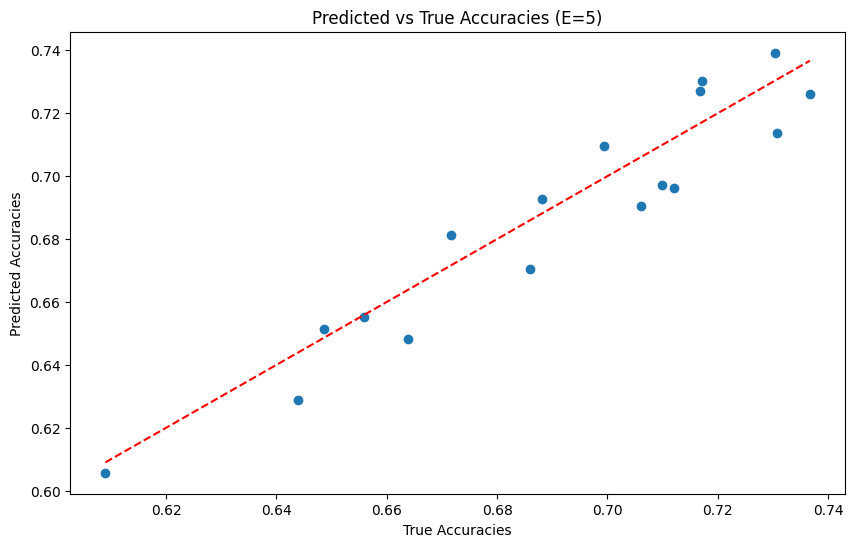

Epochs: 10, MSE: 9.629476677406504e-05


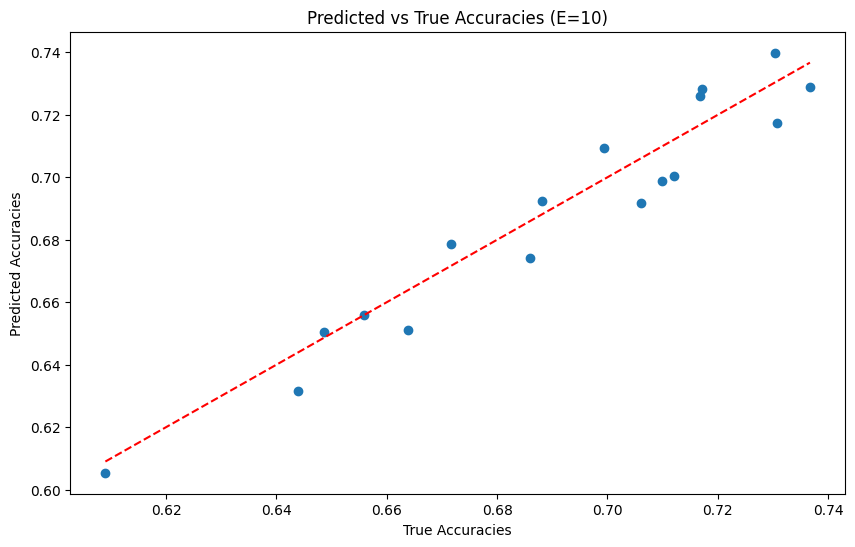

Epochs: 20, MSE: 6.125156764030428e-05


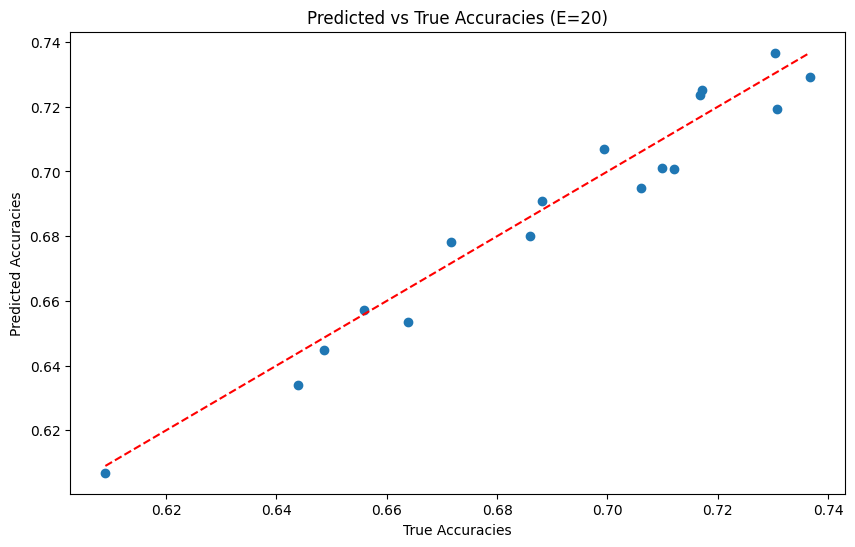

Epochs: 30, MSE: 5.3649053454617266e-05


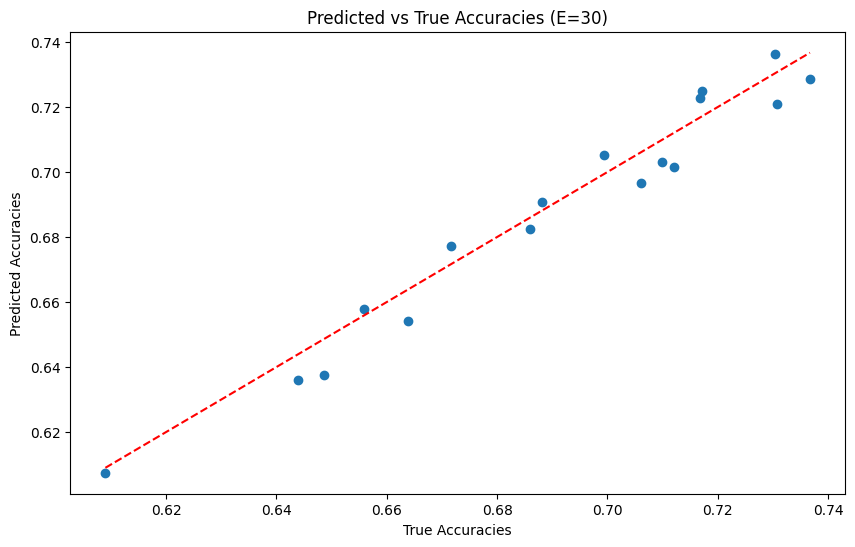

Epochs: 60, MSE: 4.807833577595589e-05


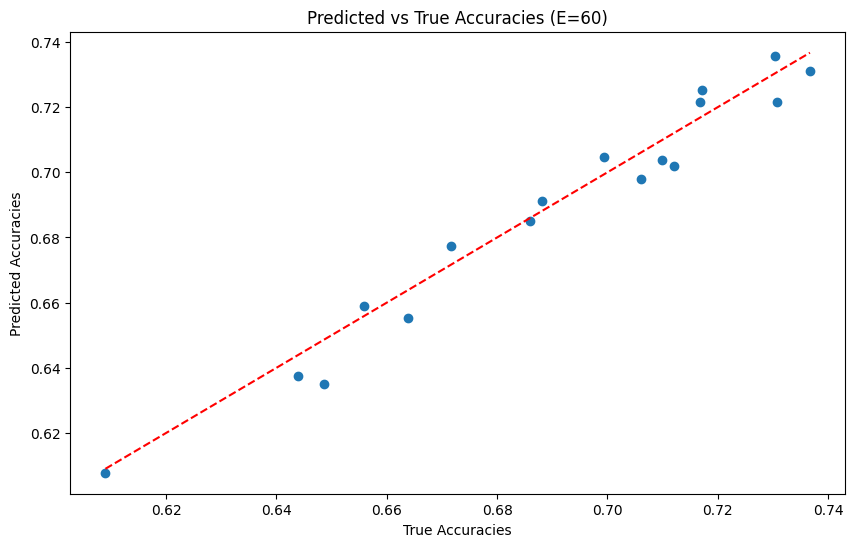

In [23]:
# Store MSE values for different E values
mse_values = []
E_values = [5, 10, 20, 30, 60]
results = {}
# Evaluate the model for different values of E
for E in E_values:
    model, y_test, y_pred, mse = train_model(E, 150)
    mse_values.append(mse)

    # Plot Predicted vs True Accuracies
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('True Accuracies')
    plt.ylabel('Predicted Accuracies')
    plt.title(f'Predicted vs True Accuracies (E={E})')
    plt.show()


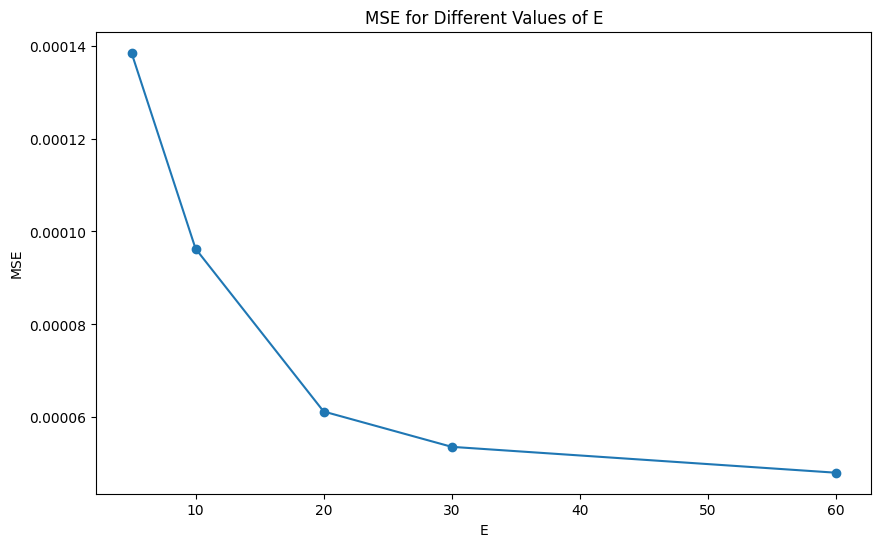

In [24]:
# Plot MSE for different values of E
plt.figure(figsize=(10, 6))
plt.plot(E_values, mse_values, marker='o')
plt.xlabel('E')
plt.ylabel('MSE')
plt.title('MSE for Different Values of E')
plt.show()

In [27]:

# Report the accuracies for the given settings
for E in E_values:
    print(f'Settings: E={E}, M=150')
    if E in results:
        print('True Accuracies:', results[E]['true'])
        print('Predicted Accuracies:', results[E]['predicted'])
    else:
        print('No results available for E=', E)
    print()

Settings: E=5, M=150
True Accuracies: [0.7308 0.7304 0.686  0.7098 0.7171 0.6559 0.6882 0.7168 0.644  0.6717
 0.6993 0.609  0.6638 0.7121 0.6486 0.7061 0.7367]
Predicted Accuracies: [0.71372656 0.73924052 0.6706327  0.69726592 0.73014633 0.65536627
 0.69282185 0.72709967 0.62889269 0.68126469 0.70960803 0.60571165
 0.64827963 0.69631659 0.65130568 0.69047257 0.72598643]

Settings: E=10, M=150
True Accuracies: [0.7308 0.7304 0.686  0.7098 0.7171 0.6559 0.6882 0.7168 0.644  0.6717
 0.6993 0.609  0.6638 0.7121 0.6486 0.7061 0.7367]
Predicted Accuracies: [0.71732944 0.7398771  0.67425318 0.698837   0.7281127  0.65597524
 0.69246427 0.72596474 0.63149141 0.67865759 0.70924131 0.60541455
 0.65105492 0.70034349 0.65038102 0.69191852 0.72878764]

Settings: E=20, M=150
True Accuracies: [0.7308 0.7304 0.686  0.7098 0.7171 0.6559 0.6882 0.7168 0.644  0.6717
 0.6993 0.609  0.6638 0.7121 0.6486 0.7061 0.7367]
Predicted Accuracies: [0.71936912 0.73648291 0.67995251 0.7011653  0.72525371 0.65704461
 

**Using TensorFlow**

In [28]:
import tensorflow as tf

In [46]:
# Function to extract features
def extract_features_dnn(indices, E):
    features = []
    targets = []
    for idx in indices:
        if idx >= len(hp_space) or idx >= len(train_loss) or idx >= len(eval_loss) or idx >= len(eval_acc):
            continue  # Skip indices that are out of bounds
        hyperparams = hp_space.iloc[idx].values.astype(np.float32)
        train_loss_values = train_loss.iloc[idx, 4:E*50+4].values.astype(np.float32) if (E*50+4) <= train_loss.shape[1] else train_loss.iloc[idx, 4:].values.astype(np.float32)
        eval_loss_values = eval_loss.iloc[idx, 4:E+4].values.astype(np.float32) if (E+4) <= eval_loss.shape[1] else eval_loss.iloc[idx, 4:].values.astype(np.float32)
        eval_acc_values = eval_acc.iloc[idx, 4:E+4].values.astype(np.float32) if (E+4) <= eval_acc.shape[1] else eval_acc.iloc[idx, 4:].values.astype(np.float32)
        features.append(np.concatenate((hyperparams, train_loss_values, eval_loss_values, eval_acc_values)))
        targets.append(eval_acc.iloc[idx, -1])
    return np.array(features), np.array(targets).astype(np.float32)


In [47]:
def create_dnn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to train the DNN model and evaluate on the test set
def train_dnn_model(E, M, epochs=50):
    X_train, y_train = extract_features_dnn(train_indices, E)
    X_val, y_val = extract_features_dnn(val_indices, E)
    X_test, y_test = extract_features_dnn(test_indices, E)

    model = create_dnn_model(X_train.shape[1])
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=32, verbose=0)

    y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    print(f'Epochs: {E}, MSE: {mse}')
    return mse

In [48]:
# Evaluate the model for different values of E
mse_values = []

for E in [5, 10, 20, 30, 60]:
    mse = train_dnn_model(E, 150)
    mse_values.append(mse)

# Print MSE values for different E
for E, mse in zip([5, 10, 20, 30, 60], mse_values):
    print(f'MSE for E={E}: {mse}')

1/1 [==============================] - 0s 88ms/step
Epochs: 5, MSE: 0.0015370416222140193
1/1 [==============================] - 0s 66ms/step
Epochs: 10, MSE: 0.0016481787897646427
1/1 [==============================] - 0s 125ms/step
Epochs: 20, MSE: 0.00211126497015357
1/1 [==============================] - 0s 64ms/step
Epochs: 30, MSE: 0.002050757873803377
1/1 [==============================] - 0s 65ms/step
Epochs: 60, MSE: 0.007334786467254162
MSE for E=5: 0.0015370416222140193
MSE for E=10: 0.0016481787897646427
MSE for E=20: 0.00211126497015357
MSE for E=30: 0.002050757873803377
MSE for E=60: 0.007334786467254162


In [31]:
for E in E_values:
    print(f'Settings: E={E}, M=150')
    if E in results:
        print('True Accuracies:', results[E]['true'].flatten())
        print('Predicted Accuracies:', results[E]['predicted'].flatten())
    else:
        print('No results available for E=', E)
    print()

Settings: E=5, M=150
True Accuracies: [0.7308 0.7304 0.686  0.7098 0.7171 0.6559 0.6882 0.7168 0.644  0.6717
 0.6993 0.609  0.6638 0.7121 0.6486 0.7061 0.7367]
Predicted Accuracies: [0.71372656 0.73924052 0.6706327  0.69726592 0.73014633 0.65536627
 0.69282185 0.72709967 0.62889269 0.68126469 0.70960803 0.60571165
 0.64827963 0.69631659 0.65130568 0.69047257 0.72598643]

Settings: E=10, M=150
True Accuracies: [0.7308 0.7304 0.686  0.7098 0.7171 0.6559 0.6882 0.7168 0.644  0.6717
 0.6993 0.609  0.6638 0.7121 0.6486 0.7061 0.7367]
Predicted Accuracies: [0.71732944 0.7398771  0.67425318 0.698837   0.7281127  0.65597524
 0.69246427 0.72596474 0.63149141 0.67865759 0.70924131 0.60541455
 0.65105492 0.70034349 0.65038102 0.69191852 0.72878764]

Settings: E=20, M=150
True Accuracies: [0.7308 0.7304 0.686  0.7098 0.7171 0.6559 0.6882 0.7168 0.644  0.6717
 0.6993 0.609  0.6638 0.7121 0.6486 0.7061 0.7367]
Predicted Accuracies: [0.71936912 0.73648291 0.67995251 0.7011653  0.72525371 0.65704461
 